In [113]:
import pandas as pd
import numpy as np
import re
import pandas as pd
ProductSize_path=r'C:\Users\eitanb\Documents\DS\ML\ML_project\DATA/ProductSize_Null_fix_model.pkl'
file_path_train = r"C:\Users\eitanb\Documents\DS\ML\ML_project\DATA/Train.csv"
df = pd.read_csv(file_path_train)

C:\Users\eitanb\AppData\Local\Temp\ipykernel_3164\2172621849.py:7: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_train)


In [117]:
len(df.ModelID.unique())

5218

In [118]:
len(df.MachineID.unique())

341027

In [119]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [145]:
['SalesID', 'SalePrice',  'ModelID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 
       'Drive_System', 'Enclosure', 
        'Transmission', 'Turbocharged',  'Engine_Horsepower', 'Hydraulics',
         'Tire_Size'
       'Track_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']

fiModelDesc
310G        5039
416C        4869
580K        4315
310E        4233
140G        4083
            ... 
EX210-5        1
KX025          1
EX120-5F       1
EX100-5E       1
HW180          1
Name: count, Length: 4999, dtype: int64

In [146]:
def create_model_category_mapping(training_df):
    """
    Creates a mapping of ModelID to Model_Category based on fiModelDesc and SalePrice in training data.
    
    Parameters:
    training_df (pd.DataFrame): Training dataset containing fiModelDesc and SalePrice.
    
    Returns:
    dict: A dictionary mapping ModelID to Model_Category.
    """
    # Compute average SalePrice per fiModelDesc in training data
    model_avg_price = training_df.groupby("fiModelDesc")["SalePrice"].mean()
    
    # Define price categories
    def categorize_price(price):
        if price < 20000:
            return "Low Price Models"
        elif 20000 <= price < 60000:
            return "Mid Price Models"
        else:
            return "High Price Models"
    
    # Map fiModelDesc to categories
    model_category_mapping = model_avg_price.apply(categorize_price).to_dict()
    
    # Create ModelID to category mapping using fiModelDesc
    training_df["Model_Category"] = training_df["fiModelDesc"].map(model_category_mapping)
    modelid_to_category = training_df.set_index("ModelID")["Model_Category"].to_dict()
    
    return modelid_to_category, model_category_mapping

def categorize_model_id(df, modelid_to_category, model_category_mapping):
    """
    Categorizes ModelID based on precomputed price categories.
    If ModelID is not found, falls back to fiModelDesc categorization.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing ModelID and fiModelDesc columns.
    modelid_to_category (dict): Mapping of ModelID to Model_Category.
    model_category_mapping (dict): Mapping of fiModelDesc to Model_Category for fallback.
    
    Returns:
    pd.Series: A Series with categorized model price labels.
    """
    df["Predicted_Model_Category"] = df["ModelID"].map(modelid_to_category)
    
    # Handle missing ModelID by checking fiModelDesc mapping
    missing_mask = df["Predicted_Model_Category"].isna()
    df.loc[missing_mask, "Predicted_Model_Category"] = df.loc[missing_mask, "fiModelDesc"].map(model_category_mapping)
    
    # Handle any remaining missing values by assigning 'Unknown'
    df["Predicted_Model_Category"].fillna("Unknown", inplace=True)
    
    return df["Predicted_Model_Category"]

# Example usage:
# modelid_to_category, model_category_mapping = create_model_category_mapping(training_df)
# test_df["Predicted_Model_Category"] = categorize_model_id(test_df, modelid_to_category, model_category_mapping)
# Create mappings from training data
modelid_to_category, model_category_mapping = create_model_category_mapping(df)

# Apply categorization to test data
df["Predicted_Model_Category"] = categorize_model_id(df, modelid_to_category, model_category_mapping)

C:\Users\eitanb\AppData\Local\Temp\ipykernel_3164\1036832790.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Predicted_Model_Category"].fillna("Unknown", inplace=True)


In [148]:
modelid_to_category

{3157: 'Mid Price Models',
 77: 'Mid Price Models',
 7009: 'Low Price Models',
 332: 'Mid Price Models',
 17311: 'Low Price Models',
 4605: 'Mid Price Models',
 1937: 'Mid Price Models',
 3539: 'Mid Price Models',
 36003: 'Low Price Models',
 3883: 'Mid Price Models',
 5255: 'Mid Price Models',
 2232: 'Mid Price Models',
 3542: 'Mid Price Models',
 5162: 'Mid Price Models',
 4604: 'Mid Price Models',
 9510: 'Low Price Models',
 21442: 'Low Price Models',
 7040: 'Low Price Models',
 3177: 'Low Price Models',
 8867: 'Mid Price Models',
 3350: 'Mid Price Models',
 85: 'High Price Models',
 25458: 'Mid Price Models',
 19167: 'Mid Price Models',
 1333: 'High Price Models',
 1263: 'High Price Models',
 9566: 'Low Price Models',
 9109: 'Mid Price Models',
 1918: 'Low Price Models',
 13395: 'Low Price Models',
 112: 'Mid Price Models',
 7110: 'Low Price Models',
 7043: 'Low Price Models',
 18604: 'Low Price Models',
 3362: 'Mid Price Models',
 1088: 'Mid Price Models',
 5853: 'Mid Price Models

In [136]:
list1=['EROPS','OROPS','EROPS AC']
list2=['NO ROPS','None or Unspecified']

In [137]:
df['Enclosure_cat']=0
df.loc[df['Enclosure'].isin(list1), 'Enclosure_cat'] = 1
df.loc[df['Enclosure'].isin(list2), 'Enclosure_cat'] = 0
df.loc[df['Enclosure']=='EROPS w AC','Enclosure_cat']=2

In [ ]:
def Enclosure_fun(df):
    list1=['EROPS','OROPS','EROPS AC']
    list2=['NO ROPS','None or Unspecified']
    df['Enclosure_cat']=0
    df.loc[df['Enclosure'].isin(list1), 'Enclosure_cat'] = 1
    df.loc[df['Enclosure'].isin(list2), 'Enclosure_cat'] = 0
    df.loc[df['Enclosure']=='EROPS w AC','Enclosure_cat']=2
    retuen df

In [2]:
import pandas as pd
import numpy as np
import re
import pandas as pd
ProductSize_path=r'C:\Users\eitanb\Documents\DS\ML\ML_project\DATA/ProductSize_Null_fix_model.pkl'
file_path_train = r"C:\Users\eitanb\Documents\DS\ML\ML_project\DATA/Train.csv"
df = pd.read_csv(file_path_train)
def preprocess_product_size(df):
    """
    Function to preprocess and impute missing ProductSize values based on fiProductClassDesc.
    
    Steps:
    1. Extract Product Type and Metric Tons / Horsepower from fiProductClassDesc.
    2. Identify Unit Type (Metric Tons, Horsepower, or Lb Operating Capacity).
    3. Convert Metric Tons / Horsepower to numerical values.
    4. Use Metric Tons to impute missing ProductSize values.
    """
    
    # Step 1: Extract Product Type and Size Descriptor
    def split_product_desc(desc):
        if pd.isna(desc):
            return pd.NA, pd.NA
        match = re.search(r'(.+?)-\s*([\d\.]+.*)', desc)
        if match:
            return match.group(1).strip(), match.group(2).strip()
        return desc.strip(), pd.NA  # If no match, return full description as product
    
    df[['Product_Type', 'Metric_Tons_HP']] = df['fiProductClassDesc'].apply(lambda x: pd.Series(split_product_desc(x)))
    
    # Step 2: Identify Unit Type
    def extract_unit_type(desc):
        if pd.isna(desc):
            return pd.NA
        if "Metric Tons" in desc:
            return "Metric Tons"
        elif "Horsepower" in desc:
            return "Horsepower"
        elif "Lb Operating Capacity" in desc:
            return "Lb Operating Capacity"
        return pd.NA
    
    df["Unit_Type"] = df["Metric_Tons_HP"].apply(extract_unit_type)
    
    # Step 3: Convert Metric Tons to numerical values
    def extract_numeric_range(value):
        """Extracts the average value from a range like '12.0 to 14.0 Metric Tons'."""
        if pd.isna(value) or not isinstance(value, str):
            return np.nan
        numbers = re.findall(r'[\d\.]+', value)
        if len(numbers) == 2:  # If range exists, take the average
            return (float(numbers[0]) + float(numbers[1])) / 2
        elif len(numbers) == 1:  # If only one number exists, use it
            return float(numbers[0])
        return np.nan
    
    df['Metric_Tons_Value'] = df['Metric_Tons_HP'].apply(lambda x: extract_numeric_range(x) if isinstance(x, str) else np.nan)
    
    # Step 4: Impute missing ProductSize values using Metric Tons
    def impute_product_size(row):
        if pd.isna(row['ProductSize']) and not pd.isna(row['Metric_Tons_Value']):
            if row['Metric_Tons_Value'] <= 5:
                return 'Mini'
            elif 5 < row['Metric_Tons_Value'] <= 75:
                return 'Compact'
            elif 20 < row['Metric_Tons_Value'] <= 50:
                return 'Large / Medium'
            elif 75 < row['Metric_Tons_Value'] <= 200:
                return 'Medium'
            elif row['Metric_Tons_Value'] > 200:
                return 'Large'
        return row['ProductSize']
    
    df['ProductSize_Imputed'] = df.apply(impute_product_size, axis=1)
    df.drop(column='ProductSize',inplace=True)
    
    return df


C:\Users\eitanb\AppData\Local\Temp\ipykernel_3164\1181865080.py:7: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_train)


In [99]:
import pandas as pd
import numpy as np
import re
import pandas as pd
ProductSize_path=r'C:\Users\eitanb\Documents\DS\ML\ML_project\DATA/ProductSize_Null_fix_model.pkl'
file_path_train = r"C:\Users\eitanb\Documents\DS\ML\ML_project\DATA/Train.csv"
df = pd.read_csv(file_path_train)

C:\Users\eitanb\AppData\Local\Temp\ipykernel_3164\2172621849.py:7: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_train)


In [100]:
import pandas as pd
import numpy as np
import re

def extract_horsepower(df):
    """
    Extracts and imputes missing Horsepower values from fiProductClassDesc.
    Optimized for performance using vectorized operations.
    """
    def extract_numeric_range(value):
        """Extracts the average horsepower value from a range like '100 to 120 Horsepower'."""
        if pd.isna(value) or not isinstance(value, str):
            return np.nan
        numbers = re.findall(r'[\d\.]+', value)
        if len(numbers) == 2:
            return (float(numbers[0]) + float(numbers[1])) / 2
        elif len(numbers) == 1:
            return float(numbers[0])
        return np.nan
    
    # Identify rows with Horsepower in fiProductClassDesc
    mask_horsepower = df['fiProductClassDesc'].str.contains("Horsepower", na=False)
    
    # Extract horsepower values
    df.loc[mask_horsepower, 'Horsepower_Unit_Type'] = 'Horsepower'
    df.loc[mask_horsepower, 'Extracted_Horsepower'] = df.loc[mask_horsepower, 'fiProductClassDesc'].apply(extract_numeric_range)
    
    # Handle 'Variable' and 'No' values in Engine_Horsepower
    df.loc[df['Engine_Horsepower'].isin(['Variable', 'No']), 'Engine_Horsepower'] = np.nan
    
    # Impute missing Engine_Horsepower values where Extracted_Horsepower is available
    df['Engine_Horsepower_Imputed'] = df['Engine_Horsepower'].combine_first(df['Extracted_Horsepower'])
    
    # Fill remaining NaN values with median horsepower
    #df['Engine_Horsepower_Imputed'].fillna(df['Engine_Horsepower_Imputed'].median(), inplace=True)
    
    return df


In [101]:
df=extract_horsepower(df)

C:\Users\eitanb\AppData\Local\Temp\ipykernel_3164\1484382639.py:32: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df['Engine_Horsepower_Imputed'] = df['Engine_Horsepower'].combine_first(df['Extracted_Horsepower'])


In [102]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'Horsepower_Unit_Type', 'Extracted_Horsepower',
       'Engine_Horsepo

In [103]:
df[['Engine_Horsepower_Imputed']].value_counts()

Engine_Horsepower_Imputed
95.0                         18419
47.5                         17788
162.5                        15114
145.0                        11140
260.0                        10980
127.5                        10551
157.5                         8866
175.0                         7561
187.5                         7471
105.0                         7105
87.5                          7096
80.0                          6773
225.0                         6557
137.5                         5487
312.5                         5308
142.5                         4913
117.5                         4877
70.0                          4669
212.5                         3090
425.0                         3024
185.0                         2866
262.5                         1476
237.5                         1324
200.0                         1173
115.0                         1041
50.0                           764
85.0                           432
750.0                        

In [104]:
df.Engine_Horsepower_Imputed.isna().sum()

224622

In [105]:
df.loc[df['Engine_Horsepower']=='No'][['Horsepower_Unit_Type', 'Extracted_Horsepower',
       'Engine_Horsepower_Imputed','fiProductClassDesc']]

,Horsepower_Unit_Type,Extracted_Horsepower,Engine_Horsepower_Imputed,fiProductClassDesc


In [106]:
df.drop(columns='ProductSize',inplace=True)

In [107]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'Horsepower_Unit_Type',
       'Extracted_Horsepower', 'Engine_Horsepower_Imputed'],
      d

In [108]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Horsepower_Unit_Type,Extracted_Horsepower,Engine_Horsepower_Imputed
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,115.0,115.0
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,162.5,162.5
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,11/2/2011 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,10/25/2011 0:00,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df['Engine_Horsepower'].value_counts()

Series([], Name: count, dtype: int64)

In [59]:
df['Engine_Horsepower_Imputed'].value_counts()

Engine_Horsepower_Imputed
95.0      18419
47.5      17788
162.5     15114
145.0     11140
260.0     10980
127.5     10551
157.5      8866
175.0      7561
187.5      7471
105.0      7105
87.5       7096
80.0       6773
225.0      6557
137.5      5487
312.5      5308
142.5      4913
117.5      4877
70.0       4669
212.5      3090
425.0      3024
185.0      2866
262.5      1476
237.5      1324
200.0      1173
115.0      1041
50.0        764
85.0        432
750.0       389
20.0        224
1000.0       25
Name: count, dtype: int64

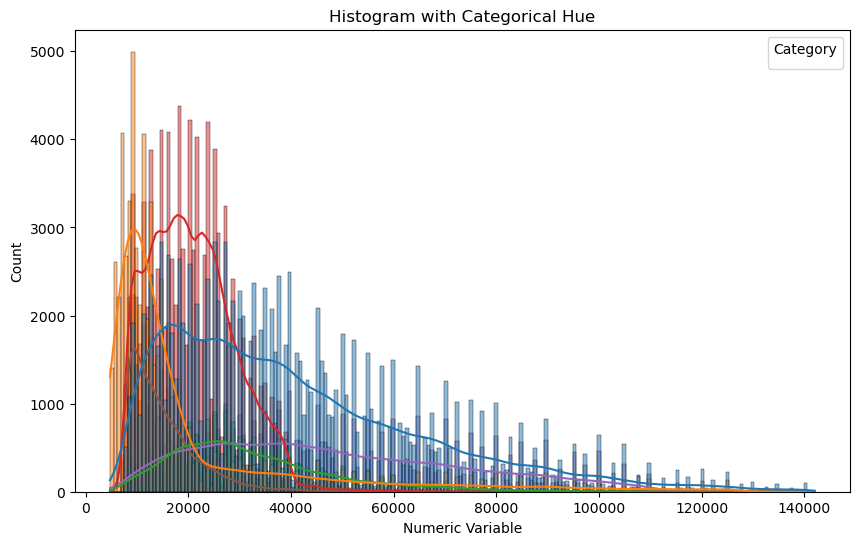

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(df, x='SalePrice', hue='ProductSize_Imputed', kde=True)

# Ensure the legend displays category names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Category", loc='upper right')

# Customize the plot
plt.xlabel('Numeric Variable')
plt.ylabel('Count')
plt.title('Histogram with Categorical Hue')

# Show plot
plt.show()

In [1]:
test=df[['SalePrice','Enclosure_cat','Enclosure']].copy

NameError: name 'df' is not defined

In [142]:
for col in test.select_dtypes(['object']):
    test[col] = test[col].astype('category')
for col in test.select_dtypes(['category']):
    test[col] = test[col].cat.codes

In [143]:
test.corr()

,SalePrice,Enclosure_cat,Enclosure
SalePrice,1.000000,0.473841,-0.185431
Enclosure_cat,0.473841,1.000000,-0.140651
Enclosure,-0.185431,-0.140651,1.000000
